In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from pyteomics import fasta

import matplotlib.pyplot as plt

In [2]:
kmers = {}

start_kmer = 2
max_kmer = 30

fasta_file = '/Users/zacharymcgrath/Desktop/nod2 data/all data/NOD2_mouse_database.fasta'


In [3]:
kmer_lens = [0 for _ in range(max_kmer)]
kmer_lens[0] = 24

for kmer_len in range(start_kmer, max_kmer):
    print(f'\nOn kmer len {kmer_len}')
    kmers = {}
    for j, entry in enumerate(fasta.read(fasta_file)):
        print(f'\rOn protein {j+1}', end='')
        seq = entry.sequence
        
        # if the len of seq is < max_kmer, skip
        if len(seq) < kmer_len: 
            continue
            
        # add all kmers of kmer len
        for k in range(len(seq) - kmer_len):
            if seq[k:k+kmer_len] not in kmers:
                kmers[seq[k:k+kmer_len]] = None
                
        # reverse it and do it again
        rev_seq = seq[::-1]
        
        # add all kmers of kmer len
        for k in range(len(rev_seq) - kmer_len):
            if rev_seq[k:k+kmer_len] not in kmers:
                kmers[rev_seq[k:k+kmer_len]] = None
                
    kmer_lens[kmer_len-1] = len(kmers)


print(kmer_lens)


On kmer len 2


On protein 1147

On protein 17039
On kmer len 3
On protein 17039
On kmer len 4
On protein 17039
On kmer len 5
On protein 17039
On kmer len 6
On protein 17039
On kmer len 7
On protein 17039
On kmer len 8
On protein 17039
On kmer len 9
On protein 17039
On kmer len 10
On protein 17039
On kmer len 11
On protein 17039
On kmer len 12
On protein 17039
On kmer len 13
On protein 17039
On kmer len 14
On protein 17039
On kmer len 15
On protein 17039
On kmer len 16
On protein 17039
On kmer len 17
On protein 17039
On kmer len 18
On protein 17039
On kmer len 19
On protein 17039
On kmer len 20
On protein 17039
On kmer len 21
On protein 17039
On kmer len 22
On protein 17039
On kmer len 23
On protein 17039
On kmer len 24
On protein 17039
On kmer len 25
On protein 17039
On kmer len 26
On protein 17039
On kmer len 27
On protein 17039
On kmer len 28
On protein 17039
On kmer len 29
On protein 17039[24, 519, 8381, 160471, 2700658, 12452245, 17233925, 17977172, 18135550, 18209147, 18254896, 18283950, 18301480, 18310784, 1831

[24, 519, 8381, 160471, 2700658, 12452245, 17233925, 17977172, 18135550, 18209147, 18254896, 18283950, 18301480, 18310784, 18313382, 18310808, 18304170, 18294066, 18281198, 18266088, 18249026, 18230245, 18210041, 18188694, 18166257, 18143002, 18118929, 18094093, 18068608]


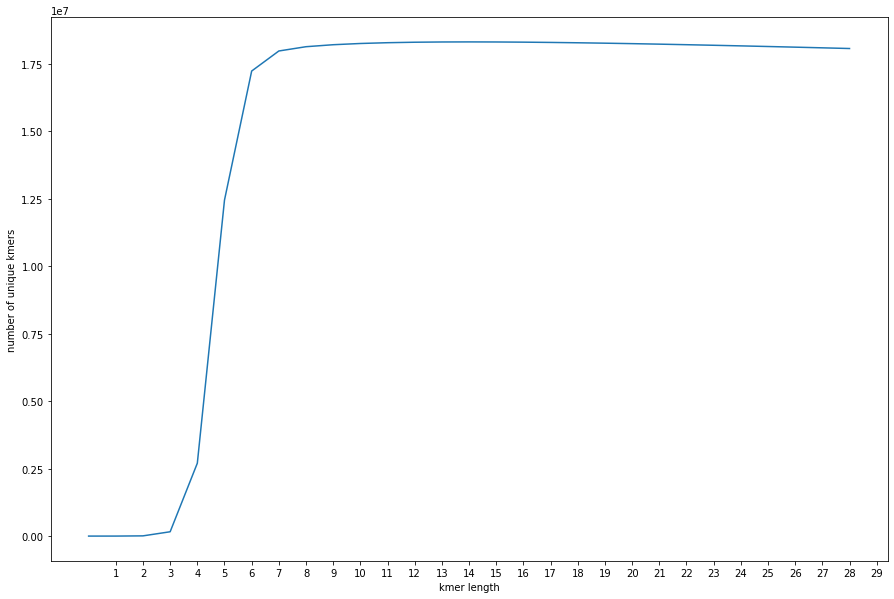

In [11]:
plt.figure(figsize=(15, 10))
plt.plot([x for x in range(max_kmer)][:-1], kmer_lens[:-1])
plt.xticks([x+1 for x in range(max_kmer-1)])
plt.xlabel('kmer length')
plt.ylabel('number of unique kmers')
print(kmer_lens[:-1])

In [16]:
# 5 bits * len(kmer) * num(len_kmer)
size_bits = 0
for i, num in enumerate(kmer_lens[:-1]):
    size_bits += 5 * (1 + i) * num
    
print(size_bits)

38096495905


In [19]:
import sys

size_bytes_str = 0
for i, num in enumerate(kmer_lens[:-1]):
    size_bytes_str += sys.getsizeof(''.join('A' for _ in range(i+1))) * num
    
print(size_bytes_str)

28849422014
